In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\ishas\Downloads\mcdonalds.csv" 

mcdonalds = pd.read_csv(file_path)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n'],
      dtype='object')
(1453, 16)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Like.n  
0         No   -3   61  Every three months  Female     NaN  
1         No   +2   51  Every three months  Female     NaN  
2         No   +1   62  Every three months  Female     NaN  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24

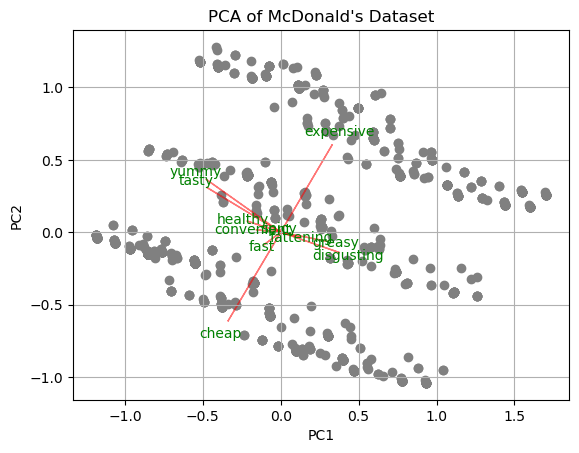

In [37]:
#4. EXPLORING DATA

print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

MD = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
print(np.round(MD.mean(), 2))

pca = PCA()
MD_pca = pca.fit_transform(MD)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained Variance:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

print(np.round(pca.components_, 1))

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonald\'s Dataset')


for i, (comp_x, comp_y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp_x, comp_y, color='r', alpha=0.5)
    plt.text(comp_x * 1.15, comp_y * 1.15, mcdonalds.columns[i], color='g', ha='center', va='center')

plt.grid()
plt.show()

In [ ]:
#5. EXTRACTING SEGMENTS

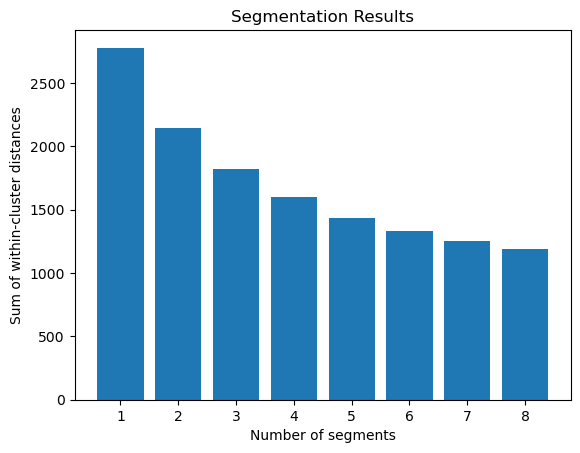

In [38]:
#5.1 USING K-MEANS ANALYSIS


np.random.seed(1234)
nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()



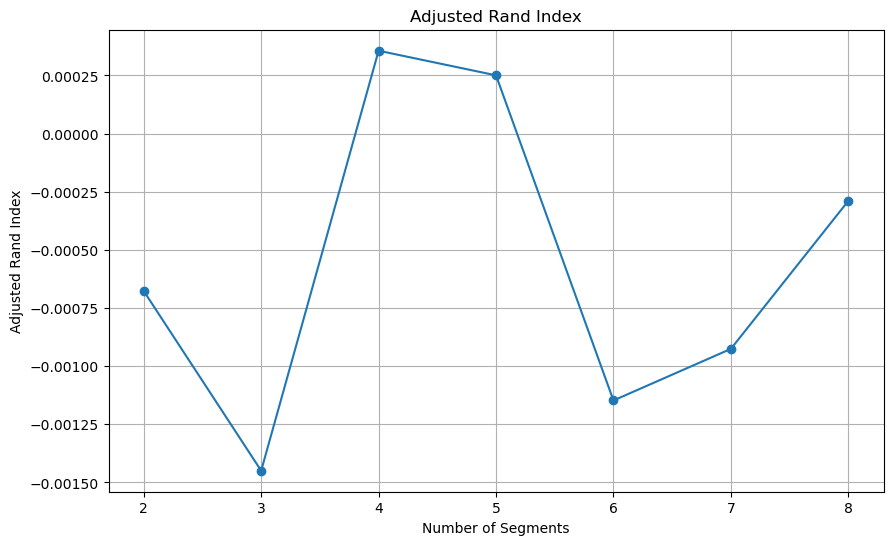

In [26]:
n_boot = 20  
ari_scores = []

for k in clusters:
    ari = []
    for _ in range(n_boot):
        sample = resample(MD_x, random_state=1234)
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234).fit(sample)
        labels_sample = kmeans.predict(sample)
        labels_original = kmeans.predict(MD_x)
        ari.append(adjusted_rand_score(labels_original, labels_sample))
    ari_scores.append(np.mean(ari))

# Plot Adjusted Rand Index
plt.figure(figsize=(10, 6))
plt.plot(clusters, ari_scores, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index')
plt.grid()
plt.show()

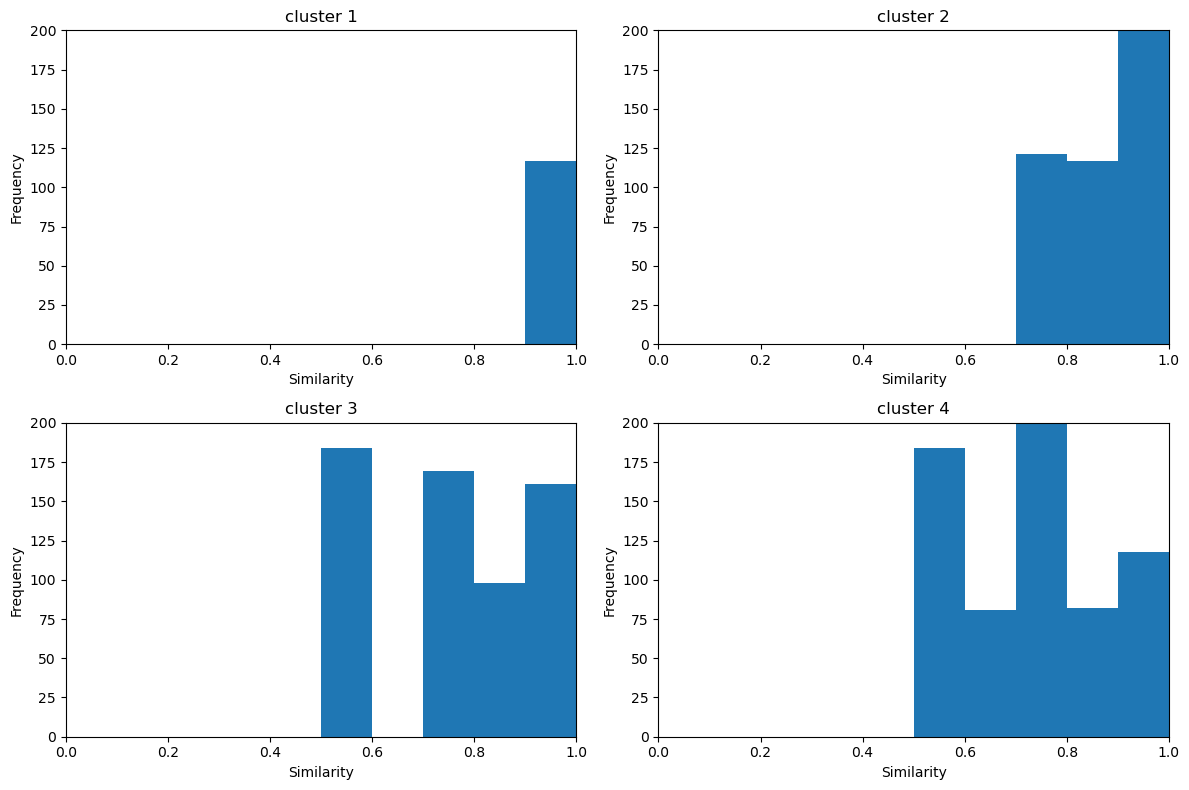

In [39]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

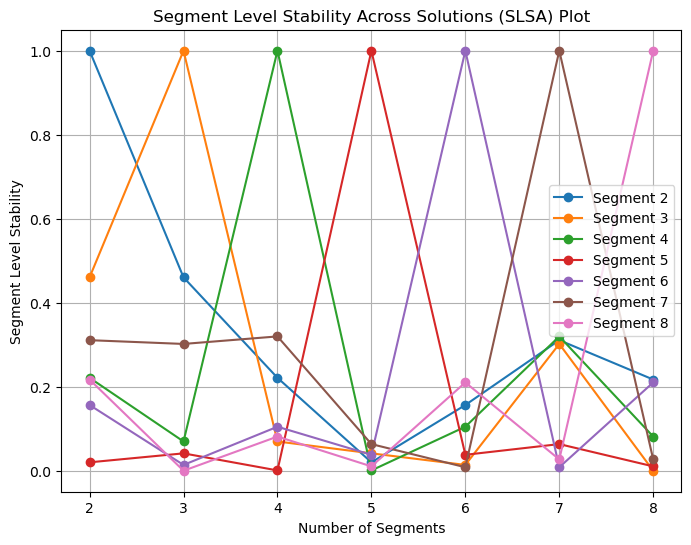

In [40]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

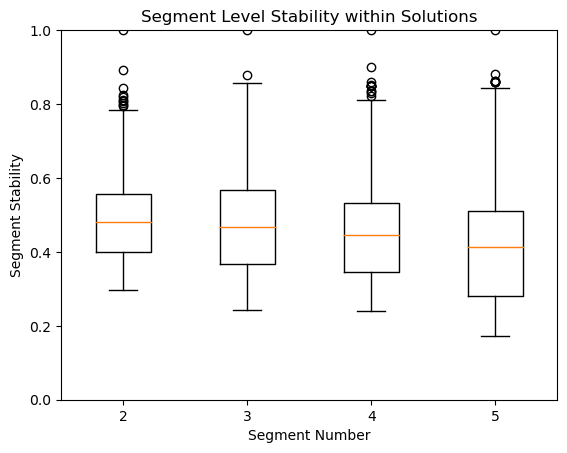

In [41]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

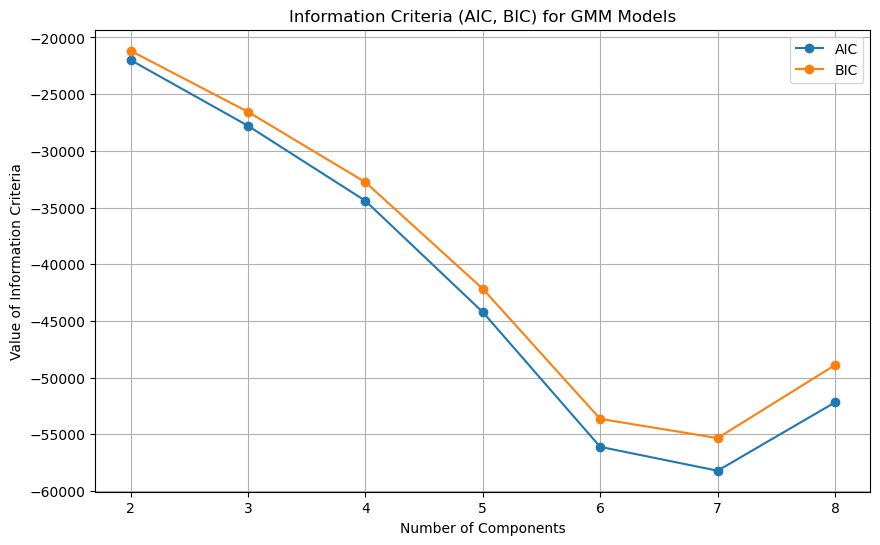

col_0    0    1    2    3
row_0                    
0       31   51  268   14
1        4  214    0   22
2      143    0  362   28
3        0    3    0  313
Log-Likelihood of GMM model with 4 components: 17513.541902228542


In [32]:
#5.2 USING MIXTURES OF DISTRIBUTIONS

from sklearn.mixture import GaussianMixture
def run_gmm(data, components, n_init):
    models = []
    for k in components:
        gmm = GaussianMixture(n_components=k, n_init=n_init, random_state=1234)
        gmm.fit(data)
        models.append(gmm)
    return models

# GMM clustering and evaluation for 2 to 8 components
gmm_models = run_gmm(MD_x, clusters, n_init)

# Plot Information Criteria (AIC, BIC) for GMM models
aic_scores = [model.aic(MD_x) for model in gmm_models]
bic_scores = [model.bic(MD_x) for model in gmm_models]

plt.figure(figsize=(10, 6))
plt.plot(clusters, aic_scores, label='AIC', marker='o')
plt.plot(clusters, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC) for GMM Models')
plt.legend()
plt.grid()
plt.show()

optimal_k = 4
gmm_optimal = gmm_models[clusters.index(optimal_k)]

# Compare KMeans and GMM clusters
kmeans_optimal = kmeans_models[clusters.index(optimal_k)]
kmeans_labels = kmeans_optimal.labels_
gmm_labels = gmm_optimal.predict(MD_x)

comparison_table = pd.crosstab(kmeans_labels, gmm_labels)
print(comparison_table)

# Log-likelihood of the models
log_likelihood_gmm = gmm_optimal.score_samples(MD_x).sum()
print("Log-Likelihood of GMM model with 4 components:", log_likelihood_gmm)


In [45]:
# 5.3 Using mixtures of regression models
import statsmodels.api as sm
like_counts = mcdonalds['Like'].value_counts()
print(like_counts)
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
print(mcdonalds['Like_n'].value_counts())
formula = 'Like_n ~ ' + ' + '.join(mcdonalds.columns[0:11])
print("Formula:", formula)
model = sm.formula.ols(formula=formula, data=mcdonalds).fit()

print(model.summary())

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64
Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64
Formula: Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     97.50
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          7.95e-156
Time:                        20:15:34   Log-Likelihood:                -2252.1
No. Observ

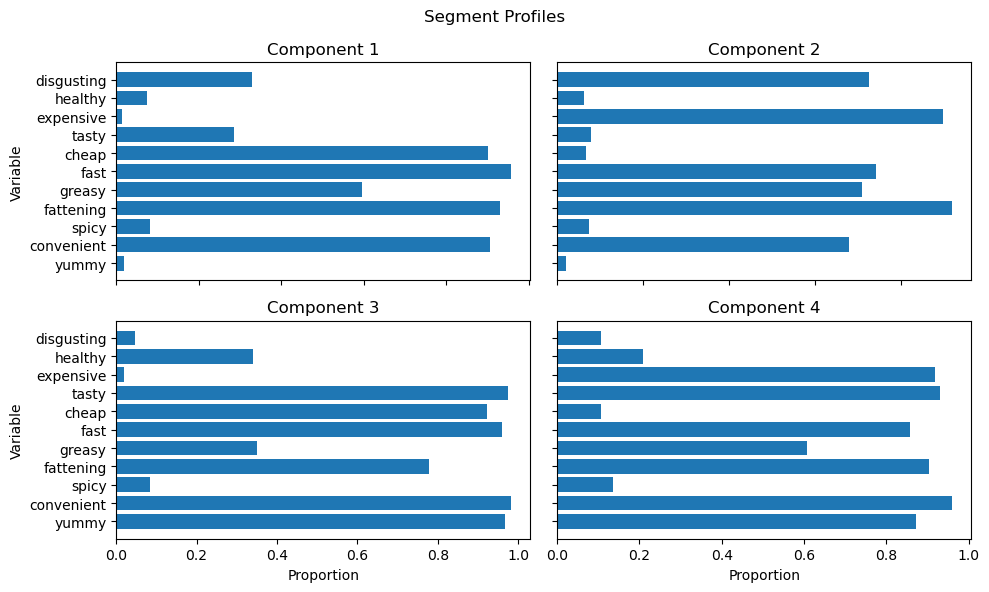

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

C:\Users\ishas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


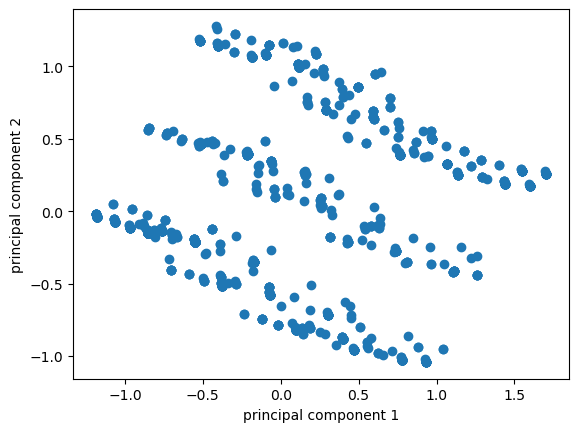

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

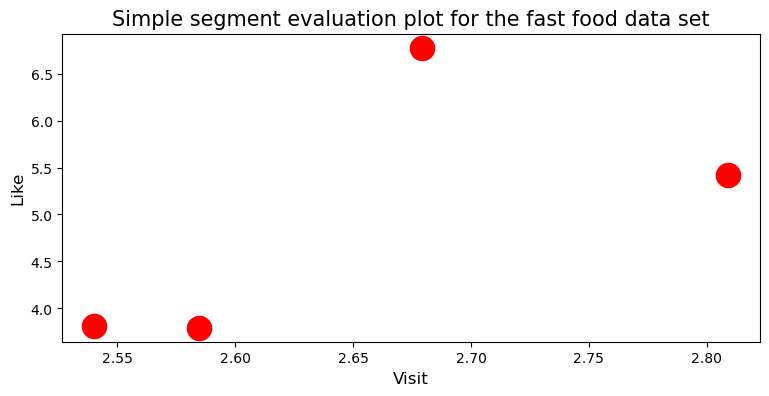

In [54]:
import seaborn as sns
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()